![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_finanical_news.ipynb)



# Training a Sentiment Analysis Classifier with NLU
## 2 class Finance News sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem

This notebook showcases the following features :

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:

<br>

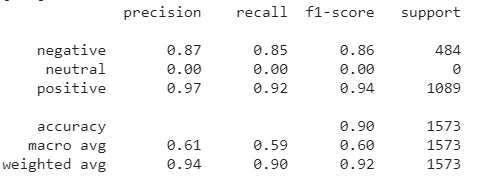




You can achieve these results or even better on this dataset with test data:


<br>


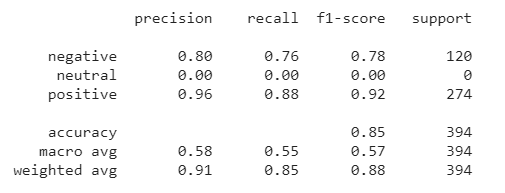

# 1. Install Java 8 and NLU

In [ ]:
!pip install -q johnsnowlabs

# 2. Download Finanical News  Sentiment dataset
https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news

This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. Further details about the dataset can be found in: Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2014): “Good debt or bad debt: Detecting semantic orientations in economic texts.” Journal of the American Society for Information Science and Technology.

In [ ]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/financial_news/all-data.csv


In [3]:
import pandas as pd
train_path = '/content/all-data.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neutral"])]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
4631,"The OMX Nordic 40 OMXN40 index , comprising th...",negative
4512,Dubai Nokia has announced the launch of `` Com...,positive
2860,credit 20 November 2009 - Finnish glass techno...,positive
1780,HELSINKI AFX - Outokumpu said its technology u...,positive
845,"Helsingin Uutiset , Vantaan Sanomat and Lansiv...",positive
...,...,...
186,"EPS for the quarter was EUR0 .00 , as compared...",positive
47,The company also estimates the already carried...,positive
1492,A realignment of interests in the sector is cl...,positive
2094,European traffic grew nearly 30 % .,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [4]:
from johnsnowlabs import nlp
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlp.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        17
    positive       0.66      1.00      0.80        33

    accuracy                           0.66        50
   macro avg       0.33      0.50      0.40        50
weighted avg       0.44      0.66      0.52        50



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,"The OMX Nordic 40 OMXN40 index , comprising th...","[-0.5881205201148987, 0.19063492119312286, -0....",positive,7.0,"The OMX Nordic 40 OMXN40 index , comprising th...",negative
1,Dubai Nokia has announced the launch of `` Com...,"[-0.37779635190963745, -0.20781250298023224, -...",positive,2.0,Dubai Nokia has announced the launch of `` Com...,positive
2,credit 20 November 2009 - Finnish glass techno...,"[-0.4517509937286377, 0.6735780239105225, -0.2...",positive,5.0,credit 20 November 2009 - Finnish glass techno...,positive
3,HELSINKI AFX - Outokumpu said its technology u...,"[-0.10504205524921417, 0.31528422236442566, -0...",positive,1.0,HELSINKI AFX - Outokumpu said its technology u...,positive
4,"Helsingin Uutiset , Vantaan Sanomat and Lansiv...","[-1.087294101715088, -0.1457926332950592, -0.1...",positive,2.0,"Helsingin Uutiset , Vantaan Sanomat and Lansiv...",positive
5,"Operating profit totaled EUR 5.5 mn , up from ...","[-0.643149197101593, -0.04868743568658829, -0....",positive,1.0,"Operating profit totaled EUR 5.5 mn , up from ...",positive
6,"Excluding non-recurring items , pre-tax profit...","[-0.7197213172912598, 0.31680017709732056, -0....",positive,5.0,"Excluding non-recurring items , pre-tax profit...",positive
7,1 February 2011 - Finnish textile and clothing...,"[-0.31616416573524475, 0.5464960336685181, -0....",positive,8.0,1 February 2011 - Finnish textile and clothing...,positive
8,`` There 's the issue of thieves stealing them...,"[-1.2100399732589722, 0.25674229860305786, 0.3...",positive,6.0,`` There 's the issue of thieves stealing them...,negative
9,Estonian telecoms company Elisa 's customer nu...,"[-0.3009508550167084, 0.6154500842094421, -0.4...",positive,6.0,Estonian telecoms company Elisa 's customer nu...,positive


# 4. Test the fitted pipe on new example

In [5]:
fitted_pipe.predict('According to the most recent update there has been a major decrese in the rate of oil')

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence
0,According to the most recent update there has ...,"[-0.9835950136184692, 0.07015661895275116, -0....",positive,1.0


## 5. Configure pipe training parameters

In [6]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['bert_sentence_embeddings@sent_small_bert_L2_128'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setBatchSize(8)              | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setEngine('tensorflow')      | Info: Deep Learning engine used for this model | Currently set to : tensorflow
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setIsLong(False)             | Info: Use Long type instead of Int type for inputs buffer - Some Bert models require Long instead of Int. | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setMaxSentenceLength(128)    | Info: Max sentence length to process | Currently set to : 128
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setDimension(128)            | I

## 6. Retrain with new parameters

In [7]:
# Train longer!
trainable_pipe = nlp.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)
fitted_pipe = trainable_pipe.fit(train_df.iloc[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        30
    positive       0.70      1.00      0.82        70

    accuracy                           0.70       100
   macro avg       0.35      0.50      0.41       100
weighted avg       0.49      0.70      0.58       100



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,"The OMX Nordic 40 OMXN40 index , comprising th...","[-0.5881205201148987, 0.19063492119312286, -0....",positive,1.0,"The OMX Nordic 40 OMXN40 index , comprising th...",negative
1,Dubai Nokia has announced the launch of `` Com...,"[-0.37779635190963745, -0.20781250298023224, -...",positive,1.0,Dubai Nokia has announced the launch of `` Com...,positive
2,credit 20 November 2009 - Finnish glass techno...,"[-0.4517509937286377, 0.6735780239105225, -0.2...",positive,1.0,credit 20 November 2009 - Finnish glass techno...,positive
3,HELSINKI AFX - Outokumpu said its technology u...,"[-0.10504205524921417, 0.31528422236442566, -0...",positive,1.0,HELSINKI AFX - Outokumpu said its technology u...,positive
4,"Helsingin Uutiset , Vantaan Sanomat and Lansiv...","[-1.087294101715088, -0.1457926332950592, -0.1...",positive,1.0,"Helsingin Uutiset , Vantaan Sanomat and Lansiv...",positive
...,...,...,...,...,...,...
95,Ruukki Group calculates that it has lost EUR 4...,"[-1.1240153312683105, 0.029101694002747536, -0...",positive,1.0,Ruukki Group calculates that it has lost EUR 4...,negative
96,This is the second successful effort for the f...,"[-1.0914063453674316, 0.636502742767334, -0.13...",positive,1.0,This is the second successful effort for the f...,positive
97,"For the first nine months of 2010 , Talvivaara...","[-1.4264403581619263, -0.3568509817123413, -0....",positive,1.0,"For the first nine months of 2010 , Talvivaara...",positive
98,Nordea sees a return to positive growth for th...,"[-0.5386144518852234, -0.5268656611442566, -0....",positive,1.0,Nordea sees a return to positive growth for th...,positive


#7.  Try training with different Embeddings

In [8]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlp.nlu.print_components(action='embed_sentence')

For language <am> NLU provides the following Models : 
nlu.load('am.embed_sentence.xlm_roberta') returns Spark NLP model_anno_obj sent_xlm_roberta_base_finetuned_amharic
For language <de> NLU provides the following Models : 
nlu.load('de.embed_sentence.bert.base_cased') returns Spark NLP model_anno_obj sent_bert_base_cased
For language <el> NLU provides the following Models : 
nlu.load('el.embed_sentence.bert.base_uncased') returns Spark NLP model_anno_obj sent_bert_base_uncased
For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model_anno_obj tfhub_use
nlu.load('en.embed_sentence.albert') returns Spark NLP model_anno_obj albert_base_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model_anno_obj sent_bert_base_uncased
nlu.load('en.embed_sentence.bert.base_uncased_legal') returns Spark NLP model_anno_obj sent_bert_base_uncased_legal
nlu.load('en.embed_sentence.bert.finetuned') returns Spark NLP model_anno_obj sbert_setfit_

In [9]:
trainable_pipe = nlp.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(70)
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005)
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.88      0.82      0.85       482
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.92      0.94      1091

    accuracy                           0.89      1573
   macro avg       0.61      0.58      0.60      1573
weighted avg       0.94      0.89      0.91      1573



# 7.1 evaluate on Test Data

In [10]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.81      0.75      0.78       122
     neutral       0.00      0.00      0.00         0
    positive       0.92      0.89      0.90       272

    accuracy                           0.85       394
   macro avg       0.58      0.55      0.56       394
weighted avg       0.88      0.85      0.86       394



# 8. Lets save the model

In [11]:
stored_model_path = './models/classifier_dl_trained'
fitted_pipe.save(stored_model_path)

# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [12]:
hdd_pipe = nlp.load(path=stored_model_path)

preds = hdd_pipe.predict('According to the most recent update there has been a major decrese in the rate of oil')
preds

,document,sentence_embedding_from_disk,sentiment,sentiment_confidence
0,According to the most recent update there has ...,"[-0.02168591320514679, 0.13073040544986725, 0....",negative,0.0


In [13]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['document_assembler'] has settable params:
component_list['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> component_list['bert_sentence_embeddings@sent_small_bert_L12_768'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setBatchSize(8)               | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setCaseSensitive(False)       | Info: whether to ignore case in tokens for embeddings matching | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setDimension(768)             | Info: Number of embedding dimensions | Currently set to : 768
component_list[